In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

get the titanic dataset

In [2]:
url='https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/refs/heads/master/titanic.csv'

df=pd.read_csv(url)

display the titanic dataset

In [3]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


get the column names of titanic dataset

# UNDERSTANDING THE DATASET

In [4]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

get the information of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


observation: columns like age,fare,cabin,embarked are having missing values.
All columns are having valid dtype(data type)

# DATA CLEANING

In [6]:
# age  column has to be filled with mean
age_mean=df['age'].mean()
# fare column has to be filled with mean
fare_mean=df['fare'].mean()
# embarked  column has to be filled with mode   or ('unknown)
embarked_mode=df['embarked'].mode()[0]

In [7]:
# fillna() -- used to fill the missing values (None,NaN)

df['age']=df['age'].fillna(age_mean)
df['fare']=df['fare'].fillna(fare_mean)
df['embarked']=df['embarked'].fillna(embarked_mode)

In [8]:
# cabin column which has null values has to be removed from dataset
#-------------------------------------------------------------------
# dropna()
# auto detects the rows and columns which are having missing values and removes them
# axis=0 (remove the rows which are having missing values)
# axis=1 (remove the columns which are having missing values)

df=df.dropna(axis=1)

In [9]:
# convert the fare column dtype
#-----------------------------------------
# astype() - used to convert dtype of columns
#          - we have to pass dict -- {'col':dtype , 'col':dtype ,...........}

df=df.astype({'fare':int})

# DATA TRANSFORMATION

In [10]:
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151,S,1


In [11]:
# df['name'].str.split(',',n=1) # list of elements

temp=df['name'].str.split(',',n=1,expand=True) # list has been converted to columns
last_name=temp[0]
t_fname=temp[1]
courtesy_title=t_fname.str.split('.',n=1,expand=True)[0]
first_name=t_fname.str.split('.',n=1,expand=True)[1]
# last_name , courtesy_title , first_name (series)

In [12]:
# creating new columns
df['courtesy_title']=courtesy_title
df['lname']=last_name
df['fname']=first_name

In [13]:
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,courtesy_title,lname,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211,S,1,Miss,Allen,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151,S,1,Master,Allison,Hudson Trevor


In [14]:
df=df.drop(columns=['name'])
# drop() -- used to remove the rows/records
# index=[indices of row]
# columns=[names of column]

In [15]:
df.head(2)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,courtesy_title,lname,fname
0,1,female,29.0000,0,0,24160,211,S,1,Miss,Allen,Elisabeth Walton
1,1,male,0.9167,1,2,113781,151,S,1,Master,Allison,Hudson Trevor


In [16]:
df['family_count']=df['sibsp']+df['parch']

In [17]:
df=df.drop(columns=['sibsp','parch'])
df.head(2)

,pclass,sex,age,ticket,fare,embarked,survived,courtesy_title,lname,fname,family_count
0,1,female,29.0000,24160,211,S,1,Miss,Allen,Elisabeth Walton,0
1,1,male,0.9167,113781,151,S,1,Master,Allison,Hudson Trevor,3


In [18]:
# Rename the sex column to gender column
# rename() -- used to change the name of the rows/columns
# for rows --->           index={'old_name' : 'new_name' ,............}
# for columns --->        columns={'old_name' : 'new_name' ,............}
df=df.rename(columns={'sex':'gender'})

In [19]:
df.columns

Index(['pclass', 'gender', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'courtesy_title', 'lname', 'fname', 'family_count'],
      dtype='object')

In [20]:
pd.unique(df['embarked']) # to get unique data in a column

array(['S', 'C', 'Q'], dtype=object)

In [21]:
# replace() --> used to replace the old_values by new_values
#           --> we have to pass dict
df['embarked']=df['embarked'].replace({'S':'Southampton', 'C':'Cherbourg' ,'Q':'Queenstown'})

In [22]:
df.head(2)

,pclass,gender,age,ticket,fare,embarked,survived,courtesy_title,lname,fname,family_count
0,1,female,29.0000,24160,211,Southampton,1,Miss,Allen,Elisabeth Walton,0
1,1,male,0.9167,113781,151,Southampton,1,Master,Allison,Hudson Trevor,3


In [23]:
# creating age_category using age column
df['age_category']=pd.cut(df['age'],bins=[0,2,16,25,49,100],labels=['baby','child','teen','adult','senior'])

In [24]:
df.columns

Index(['pclass', 'gender', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'courtesy_title', 'lname', 'fname', 'family_count', 'age_category'],
      dtype='object')

In [25]:
new_order=['courtesy_title','fname','lname','gender','age','age_category','ticket',
           'pclass','embarked','family_count','fare','survived']

df=df[new_order]

In [26]:
pd.unique(df['fare'])#fare as some 0 values .. idtentified

rowid=df[df['fare']==0].index # get those 0 data rows with index 

rowid# display

Index([   7,   70,  125,  150,  170,  223,  234,  363,  384,  410,  473,  528,
        581,  896,  898,  963, 1254],
      dtype='int64')

In [27]:
df=df.drop(index=[rowid[0]])# remove those rows of 0, [0]coz index as 0 of list of row id of null values and so rowid[0]
df=df.reset_index(drop=True)

In [28]:

rowid=df[df['fare']==0] # verify 

In [29]:
df.head(2)

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.0000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.9167,baby,113781,1,Southampton,3,151,1


# ANALYSIS

# get the statistical description for all numerical columns

In [30]:
df.describe()

,age,pclass,family_count,fare,survived
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,29.874163,2.295872,0.884557,32.894495,0.382263
std,12.885656,0.837390,1.584056,51.759046,0.486126
min,0.166700,1.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,0.000000,7.000000,0.000000
50%,29.881135,3.000000,0.000000,14.000000,0.000000
75%,35.000000,3.000000,1.000000,31.000000,1.000000
max,80.000000,3.000000,10.000000,512.000000,1.000000


# get top 5 records (passengers data) #head

In [31]:
df.head()

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.0000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.9167,baby,113781,1,Southampton,3,151,1
2,Miss,Helen Loraine,Allison,female,2.0000,baby,113781,1,Southampton,3,151,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.0000,adult,113781,1,Southampton,3,151,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.0000,teen,113781,1,Southampton,3,151,0


# get the last 5 records  # tail

In [32]:
df.tail()

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
1303,Miss,Hileni,Zabour,female,14.500000,child,2665,3,Cherbourg,1,14,0
1304,Miss,Thamine,Zabour,female,29.881135,adult,2665,3,Cherbourg,1,14,0
1305,Mr,Mapriededer,Zakarian,male,26.500000,adult,2656,3,Cherbourg,0,7,0
1306,Mr,Ortin,Zakarian,male,27.000000,adult,2670,3,Cherbourg,0,7,0
1307,Mr,Leo,Zimmerman,male,29.000000,adult,315082,3,Southampton,0,7,0


# get the total_no_records # length(df),df.shape[0],

In [33]:
df.shape[0]

1308

# get the total columns     #df.shape[1]

In [34]:
df.shape[1]

12

# get the first row      head(1),   df.iloc//loc [0,::]

In [35]:
df.head(1)

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.0,adult,24160,1,Southampton,0,211,1


# get the second row          #df.loc(1,::)

In [36]:
df.loc[1,::]

courtesy_title            Master
fname              Hudson Trevor
lname                    Allison
gender                      male
age                       0.9167
age_category                baby
ticket                    113781
pclass                         1
embarked             Southampton
family_count                   3
fare                         151
survived                       1
Name: 1, dtype: object

# get the fname and age of all passengers                           df.loc[:,['name','age']]

In [37]:
df.loc[::,['fname','age']]

,fname,age
0,Elisabeth Walton,29.000000
1,Hudson Trevor,0.916700
2,Helen Loraine,2.000000
3,Hudson Joshua Creighton,30.000000
4,Hudson J C (Bessie Waldo Daniels),25.000000
...,...,...
1303,Hileni,14.500000
1304,Thamine,29.881135
1305,Mapriededer,26.500000
1306,Ortin,27.000000


# get the 5th and 6th passenger fname ,age and survived details

In [38]:
df.loc[[5 ,6],['fname','age','survived']]

,fname,age,survived
5,Harry,48.0,1
6,Kornelia Theodosia,63.0,1


# get the passenger details of pclass 1

In [39]:
c=df['pclass']==1

df.loc[c,::]

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.000000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.916700,baby,113781,1,Southampton,3,151,1
2,Miss,Helen Loraine,Allison,female,2.000000,baby,113781,1,Southampton,3,151,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.000000,adult,113781,1,Southampton,3,151,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.000000,teen,113781,1,Southampton,3,151,0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,Mr,Fletcher Fellows,Williams-Lambert,male,29.881135,adult,113510,1,Southampton,0,35,0
318,Miss,Helen Alice,Wilson,female,31.000000,adult,16966,1,Cherbourg,0,134,1
319,Mr,Hugh,Woolner,male,29.881135,adult,19947,1,Southampton,0,35,1
320,Mr,George,Wright,male,62.000000,senior,113807,1,Southampton,0,26,0


# get the passenger fname and age of pclass 1

In [40]:
c=df['pclass']==1
df.loc[c,['fname','age']]


,fname,age
0,Elisabeth Walton,29.000000
1,Hudson Trevor,0.916700
2,Helen Loraine,2.000000
3,Hudson Joshua Creighton,30.000000
4,Hudson J C (Bessie Waldo Daniels),25.000000
...,...,...
317,Fletcher Fellows,29.881135
318,Helen Alice,31.000000
319,Hugh,29.881135
320,George,62.000000


# get the male passenger details of pclass 1

In [41]:
c= (df['pclass']==1) &  (df['gender']=='male')
df.loc[c,::]

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
1,Master,Hudson Trevor,Allison,male,0.916700,baby,113781,1,Southampton,3,151,1
3,Mr,Hudson Joshua Creighton,Allison,male,30.000000,adult,113781,1,Southampton,3,151,0
5,Mr,Harry,Anderson,male,48.000000,adult,19952,1,Southampton,0,26,1
8,Mr,Ramon,Artagaveytia,male,71.000000,senior,PC 17609,1,Cherbourg,0,49,0
9,Col,John Jacob,Astor,male,47.000000,adult,PC 17757,1,Cherbourg,1,227,0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,Mr,Charles Duane,Williams,male,51.000000,senior,PC 17597,1,Cherbourg,1,61,0
316,Mr,Richard Norris II,Williams,male,21.000000,teen,PC 17597,1,Cherbourg,1,61,1
317,Mr,Fletcher Fellows,Williams-Lambert,male,29.881135,adult,113510,1,Southampton,0,35,0
319,Mr,Hugh,Woolner,male,29.881135,adult,19947,1,Southampton,0,35,1


# get the female passengers fname who were survived in pclass 1

In [42]:
c= (df['pclass']==1) &  (df['sex']=='female') & (df['survived']==1)

df.loc[c,['name']]

KeyError: 'sex'

# Get the passengers details whose embarked is Southampton, cherbourg

In [ ]:
c= (df['embarked']=='S') ^  (df['embarked']=='C') 

df.loc[c,::]
#--------------------------------------------------------------------------------------
con=df['embarked'].isin(['S','C'])


# Get the no_of passengers
# Get the no_of male passengers

In [ ]:
len(df['fname']) 
df.shape[0]   # one way of approch to count the number os cell im the col

1308

In [ ]:
confition=df['sex']=='male'
df.loc[confition,['sex']].count()    # therefore .count will on;y give you the count of , without it u can achive bothe  the col along with the count

sex    843
dtype: int64

out of total number of passangers their are 64% of males and  36% of them are females

# Get the highest fare
# Get the lowest fare among female passengers

In [ ]:
df['fare'].max()
   #or
# df.loc[::,['fare']].max      

np.int64(512)

the highest fare among all the classes is 512

In [ ]:
condition=df['sex']=='female'
df.loc[condition,['fare']].min()   # female min fare

the lowest fare among the female passangers is 6


# Get the no_of_survivals
# Get the survival rate

In [ ]:
condition=df['survived']==1
df.loc[condition,['survived']].count()    #or

df['survived'].sum()

np.int64(500)

#get the number of missing values in age col ( assuming missing values exists )


In [ ]:
df['age'].isnull().sum()    # is null give bool value and sum will return int value 

# my avg idea

In [ ]:
con=df['survived']==1 
df.loc[con,['survived']].mean()


# Get the aggregates for fare column

In [ ]:
df.agg ({'fare' : ['min','max','mean','count','sum']})

# Get the no_of_passengers in each gender

In [ ]:
grp_gender= df.groupby(['sex'])
grp_gender['sex'].count()            #grp_gender.count() this will give you the count of them same but in the horizontal way for all the cols

# Get the total fare in each pclass

In [ ]:
class_group=df.groupby(['pclass'])
class_group['fare'].sum()     

# Get the pclass wise survival rate and count

In [ ]:
class_group=df.groupby(['pclass'])
class_group.agg({'survived':['count','mean']})

# Get the pclass,gender wise survival rate

In [ ]:
grp= df.groupby(['pclass','sex'] )

grp.agg({'survived':['mean']})


# Get the no.of.psgn in each pclass

In [ ]:
grp= df.groupby(['pclass'] )
grp['pclass'].count()


# Find the pclass in which highest no_of_passengers are there

In [ ]:
# no of psg in each pclass
cond= df.groupby(['pclass'])
# getting highest pclass 
cond. count().idxmax()   #idxmax is a function allows to find class having most number  of  pasg

# Find the pclass in which lowest no_of_passengers are there

In [ ]:
c=df.groupby(['pclass'])
c.count().idxmin()      

# Find the no.of.familes travelling

In [ ]:
ticket=df.groupby(['ticket'])           # you can identify the family count by ticket num
ticket.count()
  # or 
df.groupby('ticket')['ticket'].count()        # one line

# Find the no.of.familes travelling survival rate

In [ ]:
family=df.groupby('ticket').agg({'survived':['mean','count']})

# secific num
df.loc[(df['ticket']=='110152'),::]   # veerifycation purpose


,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
66,Miss,Gladys,Cherry,female,30.0,adult,110152,1,Southampton,0,86,1
194,Miss,Roberta,Maioni,female,16.0,child,110152,1,Southampton,0,86,1
244,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,female,33.0,adult,110152,1,Southampton,0,86,1


same ticket num will not mean they are family , survival is also different ,out of 1219 psg we are have 916 family counts

# find the correlation between the numerical columns

In [ ]:
df.corr(numeric_only=True)  #finding cv for only numerical col , we can analys the dependency of the col 

# What is correlation b/w fare and pclass

# what is the correlate b/w fare and survival

# What is correlation b/w age and survival

# what is correlation b/w gender and survival

# what is correlation b/w age_category and survival

In [ ]:
df.loc[::,['fare','pclass']].corr()

In [ ]:
df.loc[::,['fare','survived']].corr()

In [ ]:
df.loc[::,['age','survived']].corr()

In [ ]:

temp=df['gender'].map({'male':0,'female':1})
df.loc[::,'survived'].corr(temp)

np.float64(0.528482751867984)

In [ ]:
agecate_num=df['age_category'].map({'adult':0,'baby':1,'children':2,'teenager':3,'senior':4})
df.loc[::,'survived'].corr(agecate_num)  

therefore markdown the obj data col of age category to numeric by using map (alphabetical order)

# Get the pclass wise male and female count and survival rate

In [ ]:
pgrp=df.groupby(['pclass','gender'])
tem=df['gender'].map({'male':0,'female':1})
pgrp.count()   


courtesy_title  fname  lname  age  age_category  ticket  \
pclass gender                                                            
1      female             144    144    144  144           144     144   
       male               178    178    178  178           178     178   
2      female             106    106    106  106           106     106   
       male               171    171    171  171           171     171   
3      female             216    216    216  216           216     216   
       male               493    493    493  493           493     493   

               embarked  family_count  fare  survived  
pclass gender                                          
1      female       144           144   144       144  
       male         178           178   178       178  
2      female       106           106   106       106  
       male         171           171   171       171  
3      female       216           216   216       216  
       male         493           493   493       493

# Get the age_seg wise no.of.psgns and survival rate

In [ ]:
agegrp=df.groupby(['age'])
agegrp.agg({'survived':['count','mean']})

survived          
           count      mean
age                       
0.1667         1  1.000000
0.3333         1  0.000000
0.4167         1  1.000000
0.6667         1  1.000000
0.7500         3  0.666667
...          ...       ...
70.5000        1  0.000000
71.0000        2  0.000000
74.0000        1  0.000000
76.0000        1  1.000000
80.0000        1  1.000000

[99 rows x 2 columns]

# Get the age_seg which has high_survivale rate

In [ ]:
gp=df.groupby(['age_category'])
gp['survived'].mean()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_27380\3336043137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_seg=survie_df.groupby('age_category')['survived'].mean()
C:\Users\ashwi\AppData\Local\Temp\ipykernel_27380\3336043137.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp=df.groupby(['age_category'])


age_category
baby      0.617647
child     0.530000
teen      0.368932
adult     0.354967
senior    0.400000
Name: survived, dtype: float64

as per the count of people survived you can analyze the highest survivals is fron the adult category ie.268 out og 500 people survived 53.6% survival rate is of adults

In [ ]:
survive=df['survived']==1
survive.sum()


np.int64(500)

# Get the gender and age_seg which has high survival rate

In [ ]:
survie_df=df[df['survived']==1]
gender_by_category=survie_df.groupby(['age_category','gender'])['survived'].sum()
gender_by_category

C:\Users\ashwi\AppData\Local\Temp\ipykernel_13444\3187923105.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_by_category=survie_df.groupby(['age_category','gender'])['survived'].sum()


age_category  gender
baby          female     10
              male       11
child         female     34
              male       19
teen          female     83
              male       31
adult         female    178
              male       90
senior        female     34
              male       10
Name: survived, dtype: int64

therefore we got known highest survival was from adults category and in that gender wise male and female , females are having 178 out of 268 people survived from the whole category , now 65% of female are holding the survival rate

# Get the pclass,age_seg,gender in which survival rate is high

In [ ]:
survie_df=df[df['survived']==1]
gender_by_category=survie_df.groupby(['age_category','gender','pclass'])['survived'].sum()
gender_by_category

C:\Users\ashwi\AppData\Local\Temp\ipykernel_624\222734413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_by_category=survie_df.groupby(['age_category','gender','pclass'])['survived'].sum()


age_category  gender  pclass
baby          female  1          0
                      2          3
                      3          7
              male    1          1
                      2          7
                      3          3
child         female  1          5
                      2         13
                      3         16
              male    1          4
                      2          4
                      3         11
teen          female  1         29
                      2         27
                      3         27
              male    1          6
                      2          4
                      3         21
adult         female  1         77
                      2         46
                      3         55
              male    1         41
                      2          9
                      3         40
senior        female  1         28
                      2          5
                      3          1
              male    1   

adult>>female>>pclass1>>77  so therefore out of 178 females 77 from class-1 = 43% , out of all 834 female 77 female from c-1 >>10% appx(9.23)

# Get the solo travelers full name

In [ ]:
solo_traveler = df[df['family_count']==0]

solo_traveler['fullname']= solo_traveler['fname'] + ' ' + solo_traveler['lname']
solo_traveler.loc[::,['fullname']]

C:\Users\ashwi\AppData\Local\Temp\ipykernel_13444\4142559524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solo_traveler['fullname']= solo_traveler['fname'] + ' ' + solo_traveler['lname']


,fullname
0,Elisabeth Walton Allen
5,Harry Anderson
8,Ramon Artagaveytia
11,Leontine Pauline Aubart
12,"Ellen ""Nellie"" Barber"
...,...
1301,Wazli Yousif
1302,Gerious Yousseff
1305,Mapriededer Zakarian
1306,Ortin Zakarian


In [ ]:
# solo_travel=df['family_count']==0
# solo_travel.count()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


# solo travelers survival rate v/s psngs  with family survival rate

In [ ]:

solo_survival=df[df['family_count']==0]['survived'].mean()
family_survival= df[df['family_count']>0]['survived'].mean()
print(solo_survival)
family_survival

KeyError: 'family_count'

# Find the gender and pclass wise survival rate of solo travelers

In [ ]:
s=df.groupby(['ticket'])
c=s['ticket'].count()
c1=con[c==1].index
c2=df[df['ticket'].isin(c1)]
c3=c2.groupby(['gender','pclass'])['survived'].mean()
c3

gender  pclass
female  1         0.894737
        2         0.885714
        3         0.533333
male    1         0.348837
        2         0.118812
        3         0.131148
Name: survived, dtype: float64

# PLOTS _____________________________________________________________________________________________

# 1. Plot the total count of male and female passengers.


[Text(0, 0, '466'), Text(0, 0, '842')]

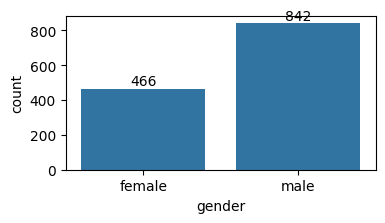

In [ ]:
plt.figure(figsize=(4,2))
a=sns.countplot(data=df,x='gender')
a.bar_label(a.containers[0])

 male passengers are more than female passengers 

# 2. Plot the total count of male and female passengers in each passenger class.

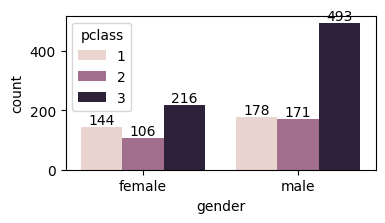

In [ ]:
plt.figure(figsize=(4,2))
a=sns.countplot(data=df,x='gender',hue='pclass')
for i in a.containers : 
   a.bar_label(i)
# whenever hue is used there shd be a for loop to get the labels for all the cintainers 

females are more in pclass 3 and males are more in pclass 3 , and the less is in pclass 1 , inb/w isthe pclass-1

# 3. Plot the count of survived and non-survived passengers.

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickslabels'

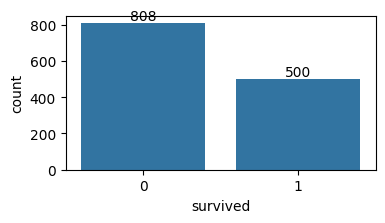

In [ ]:
plt.figure(figsize=(4,2))
b=sns.countplot(data=df,x='survived')
b.bar_label(b.containers[0])
#------------------------------------------- 
plt.xticks([0,1])
plt.xtickslabels(['died','survived'])
#--------------(or)------------------------
# plt.xticks([0,1],labels=['not-survived','survied'])

the count of survies is  less the ie a survival rate is app40%

# 4. Plot the gender-wise count of survived and non-survived passengers

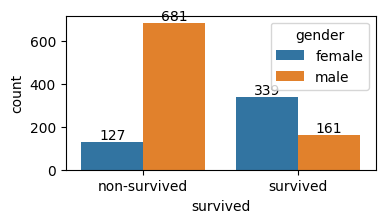

In [ ]:
plt.figure(figsize=(4,2))
c=sns.countplot(data=df,x='survived',hue='gender')
for i in c.containers:
  c.bar_label(i)
  plt.xticks([0,1],labels=['non-survived','survived'])  

male passengers are more likely to die than female  passengers 

# 5. Plot the count of passengers in each age category.


[Text(0, 0, '34'),
 Text(0, 0, '100'),
 Text(0, 0, '309'),
 Text(0, 0, '755'),
 Text(0, 0, '110')]

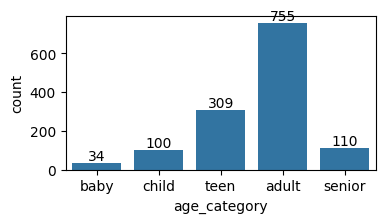

In [ ]:
plt.figure(figsize=(4,2))
d=sns.countplot(data=df,x='age_category')
d.bar_label(d.containers[0])

the count of the adults are higher than the other age category and the least is baby 

# 6. Plot the count of survived and non-survived passengers in each age category.


([<matplotlib.axis.XTick at 0x165611fd450>,
 [Text(0, 0, 'non-survived'), Text(1, 0, 'survived')])

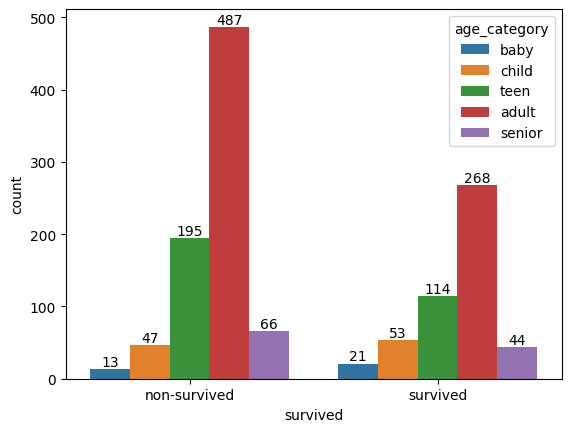

In [ ]:
e=sns.countplot(data=df,x='survived',hue='age_category')
for i in e.containers:
  e.bar_label(i)
plt.xticks([0,1],labels=['non-survived','survived'])  

the count of survival of adult are more , since the popluation of adults are more and also the non-survival rate of sdults are also more ...not much clarification by the graph !

# adults are more in which pclass 
# adults are more in which gender

[Text(0, 0, '250'), Text(0, 0, '505')]

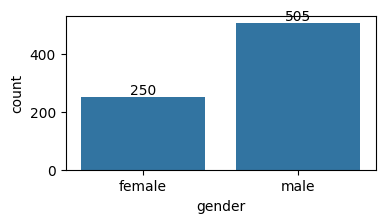

In [ ]:
# the filtertion  of the adult in a variable and ploting through the count plot would not support the graph and classifying it through the pclass by hue will be ambigious error 
cond=df[df['age_category']=='adult']
plt.figure(figsize=(4,2))
a=sns.countplot(data=cond,x='gender')
a.bar_label(a.containers[0])

the head of adult category , is more in the male, hence the poplution of male is more than female

# 7. Plot the number of passengers who boarded at each port.

[Text(0, 0, '915'), Text(0, 0, '270'), Text(0, 0, '123')]

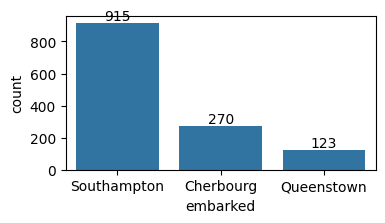

In [ ]:
plt.figure(figsize=(4,2))
f= sns.countplot(data=df,x='embarked')
f.bar_label(f.containers[0])

the pasengers are emberekdn in southampton highly and leat passengers are boared from queenstown

# 8. Plot the total fare collected for each passenger class


[Text(0, 0, '28129'), Text(0, 0, '5806'), Text(0, 0, '9091')]

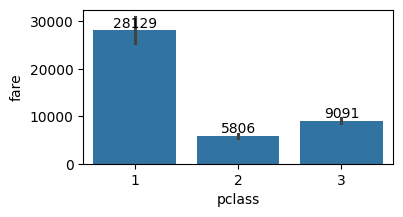

In [ ]:
plt.figure(figsize=(4,2))
g=sns.barplot(data=df,x='pclass',y='fare',estimator='sum')  # estimator default is avg
g.bar_label(g.containers[0])

the highest fare is colleted is from pclass 1 being the 2nd highest in head counts
pclass 2 is the least fare and also in the number of passengers 

# .9. Plot the total fare collected for each gender.

[Text(0, 0, '45.7682'), Text(0, 0, '25.7696')]

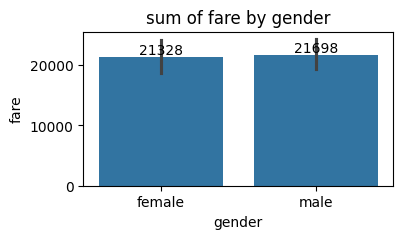

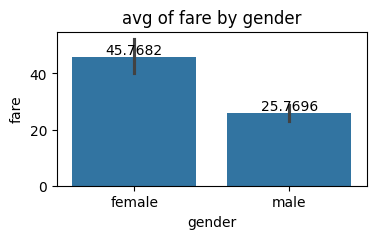

In [ ]:
plt.figure(figsize=(4,2))
plt.title('sum of fare by gender')
h=sns.barplot(data=df,x='gender',y='fare',estimator='sum')
h.bar_label(h.containers[0])

plt.figure(figsize=(4,2))
plt.title('avg of fare by gender')
h=sns.barplot(data=df,x='gender',y='fare')
h.bar_label(h.containers[0])

the head count of male passengers are more the sum tends to be higher in male only ,
mean of fare makes sense than the sum ie. to find the excat fare rate for each gender

# 10. Plot the average fare for each passenger class

[Text(0, 0, '87.3571'), Text(0, 0, '20.9603'), Text(0, 0, '12.8223')]

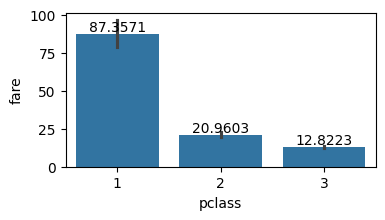

In [ ]:
plt.figure(figsize=(4,2))
g=sns.barplot(data=df,x='pclass',y='fare')
g.bar_label(g.containers[0])

pclass 1 = 2nd high in head counts , it ranks the highest in fare collection by passengers
pclass 3 = 1st high in number of passengers ,it ranks the least in the fare collection

# 11. plot the percentage of each passenger in each age category 

([<matplotlib.patches.Wedge at 0x1b38b721550>,
 [Text(-0.2642337439680879, 1.0677923620950878, 'adult'),
  Text(-0.37042377181810526, -1.0357539424361601, 'teen'),
  Text(0.6769498924123816, -0.8670287441387773, 'senior'),
  Text(1.0116585818806874, -0.4319107705384956, 'child'),
  Text(1.0963342622951417, -0.08972839749916195, 'baby')],
 [Text(-0.14412749670986613, 0.5824321975064115, '57.7%'),
  Text(-0.20204933008260284, -0.5649566958742691, '23.6%'),
  Text(0.369245395861299, -0.4729247695302421, '8.4%'),
  Text(0.5518137719349203, -0.23558769302099755, '7.6%'),
  Text(0.5980005067064409, -0.048942762272270145, '2.6%')])

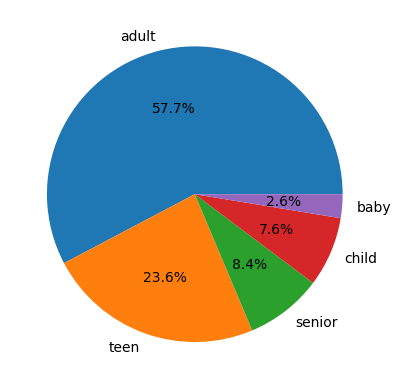

In [ ]:
age_counts=df['age_category'].value_counts()
plt.pie(x=age_counts.values,labels=age_counts.index,autopct='%1.1f%%')

the count of passengers by age  category is high in the adult of app 58 %
and the least in baby of app 3%

# 12. Plot the relationship between fare and passenger class.

IndexError: list index out of range

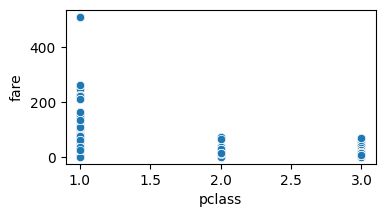

In [ ]:
plt.figure(figsize=(4,2))
i=sns.scatterplot(data=df,x='pclass',y='fare')
i.bar_label(i.containers[0])


the cor =-0.5 ie the class wise fare is incresed and tends to be inverly proportional 

# 13. Plot the distribution of fares.

IndexError: list index out of range

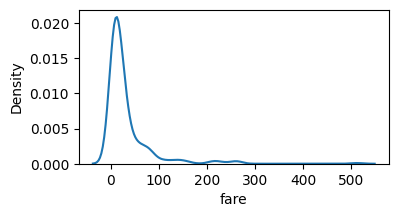

In [ ]:
# plt.figure(figsize=(4,2))
# j=sns.kdeplot(data=df,x='fare',hue='gender')  # can give fill =True , bw_
# j.bar_label(j.containers[0])

plt.figure(figsize=(4,2))
j=sns.kdeplot(data=df,x='fare')  # can give fill =True , bw_
j.bar_label(j.containers[0])

the one range of distribution is more in from the range of 0.8 to 83 approx 

# 14. Plot the distribution of ages.

IndexError: list index out of range

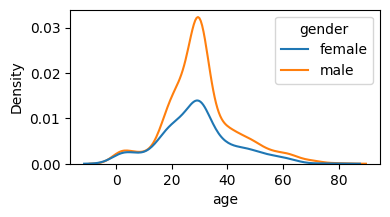

In [ ]:
# sns.kdeplt(data=df,x='age',hue='age_category')    # this crestes more lines making it messy
plt.figure(figsize=(4,2))
k=sns.kdeplot(data=df,x='age',hue='gender')         # the scatter ply accepts 2 col but here we have only one col 
k.bar_label(k.containers[0])


the age distribution range from 17 to 42 approx , since we already knew that the adults are more in each age category

# 15. Plot the survival rate in each passenger class.

[Text(0, 22, '62.11%'), Text(0, 22, '42.96%'), Text(0, 22, '25.53%')]

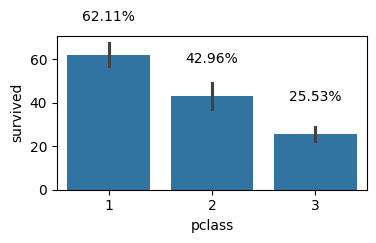

In [ ]:
# sns.barplot(data=df,x='pclass',y='survival') # its already taking the estimator as mean no need to manipulate
plt.figure(figsize=(4,2))
ag=sns.barplot(data=df,x='pclass',y='survived',estimator=lambda z:(sum(z)/len(z)*100))
ag.bar_label(ag.containers[0],fmt='%.2f%%',padding=22)

even though the pclass 3 is highest in head counts of passengers it has the least survival rate ,
bit pclass 1 has 2en highest number of passengers the survival rate it at most 50 %

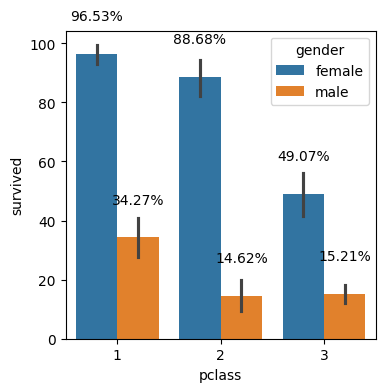

In [ ]:
plt.figure(figsize=(4,4))
ag=sns.barplot(data=df,x='pclass',y='survived',estimator=lambda z:(sum(z)/len(z)*100),hue='gender')
for i in ag.containers:
    ag.bar_label(i,fmt='%.2f%%',padding=22)

by gender wis ethe females are havin the most susrvival rate // chances

# 16. Plot the survival rate in each age category.



[Text(0, 0, '0.617647'),
 Text(0, 0, '0.53'),
 Text(0, 0, '0.368932'),
 Text(0, 0, '0.354967'),
 Text(0, 0, '0.4')]

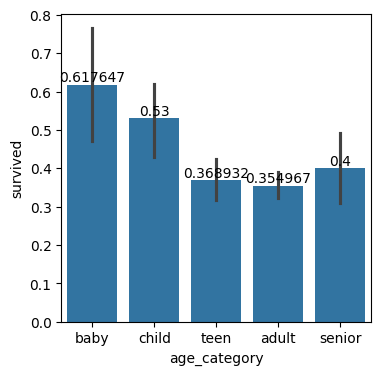

In [ ]:
plt.figure(figsize=(4,4))
l=sns.barplot(data=df,x='age_category',y='survived') # default estimator is mean only
l.bar_label(l.containers[0])

although , the adults have high number of passengers the survival chances are only 35% app
but the baby being the lowest number of passenger ther are having 50% of survival chances

# 17. Plot the variation in fare and age.


IndexError: list index out of range

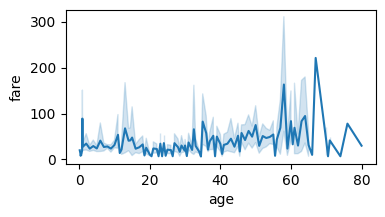

In [ ]:
plt.figure(figsize=(4,2))
m=sns.lineplot(data=df,x='age',y='fare')
m.bar_label(m.containers[0])

# 18. Did fare affect survival.


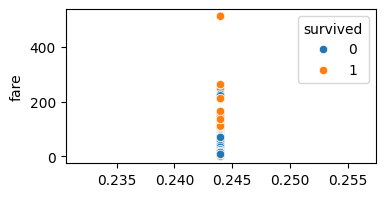

In [ ]:
plt.figure(figsize=(4,2))
corr_value = df['fare'].corr(df['survived'])
n=sns.scatterplot(data=df,x=corr_value,y='fare',hue='survived')
for i in n.containers:
 n.bar_label(i)
# sns.violinplot(data=df,x='survived', y='fare')

yes, the fare is effecting the survival by 0.24 % , so there is a chances of paying high and having higher chance of getting survived

# 19. Is there any role of age in survival.


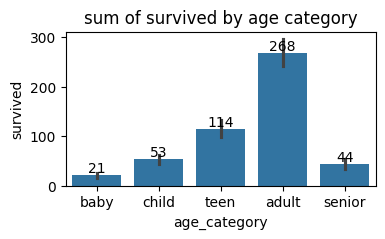

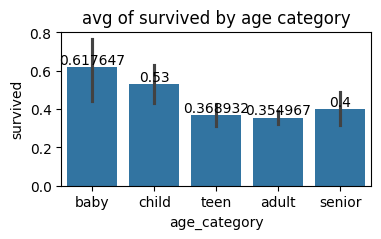

In [ ]:
plt.figure(figsize=(4,2))
plt.title('sum of survived by age category')
aa=sns.barplot(data=df,x='age_category',y='survived',estimator=sum) 
aa.bar_label(aa.containers[0])
plt.show()
plt.figure(figsize=(4,2))
plt.title('avg of survived by age category')
bb=sns.barplot(data=df,x='age_category',y='survived') 
bb.bar_label(bb.containers[0])
plt.show()

# 20. Why did females have more survival chances than males? Which factor influenced this.

#note down and compare the factors affecting the high survival of the female passengers(by either fare ,age,embarked,solo(Or)family women)

[Text(0, 0, '0.727468'), Text(0, 0, '0.191211')]

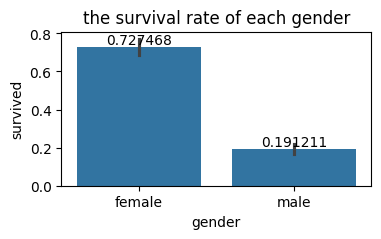

In [ ]:
plt.figure(figsize=(4,2))
plt.title('The survival rate of each gender')
a=sns.barplot(data=df,x='gender',y='survived')
a.bar_label(a.containers[0])n

the rate of survival is high in female passengers 

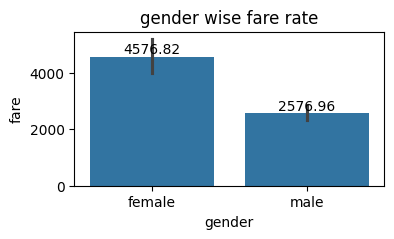

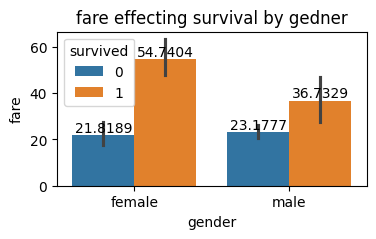

In [ ]:
plt.figure(figsize=(4,2))
dabba=sns.barplot(data=df,x='gender',y='fare',estimator=lambda z:(sum(z)/len(z)*100))
for i in dabba.containers:
    dabba.bar_label(i)
plt.title('gender wise fare rate') 

# fare and gender,
plt.figure(figsize=(4,2))
o=sns.barplot(data=df,x='gender',y='fare',hue='survived')
for i in o.containers:
   o.bar_label(i)
   plt.title('fare effecting survival by gedner')

1. females are paying more than male perphas they are having high survival rate

1. survived passengers are paying more than non-survived passengers
2. fare amount is affecting survival rate

Text(0.5, 1.0, 'boxplot to detect the outlieers for fare ')

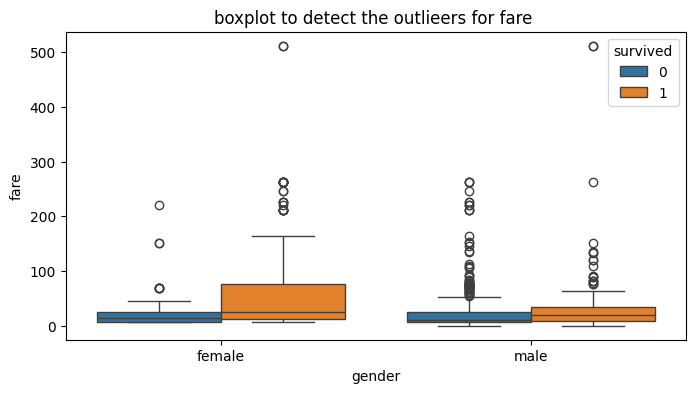

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='gender', y='fare', hue='survived')
plt.title('boxplot to detect the outlieers for fare ')

by analyzing through the bar and box plots from above , and getting the total avg percentage of fare paid by both the genders the conclusion is since,females are less in population but paying high fare may be a factor for their high survival

Text(0.5, 1.0, 'the total fare of women by pclass ')

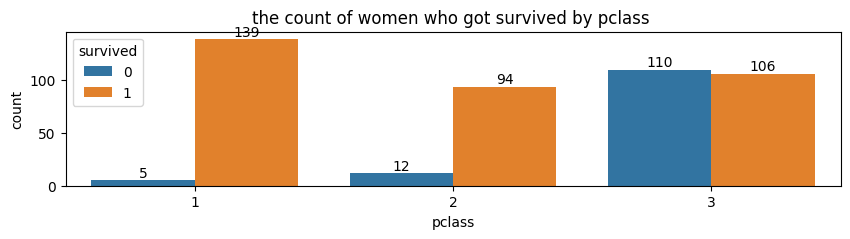

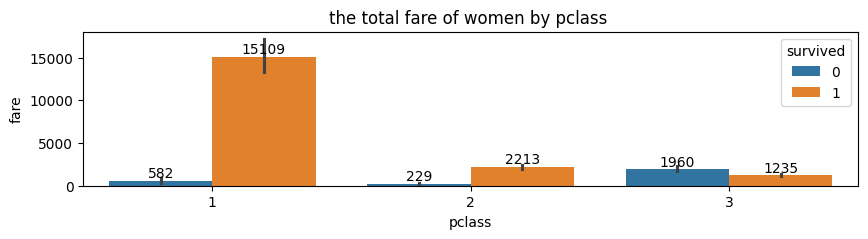

In [ ]:
# females survived by pclass
df_female = df[(df['gender'] == 'female')]
plt.figure(figsize=(10, 2))
q = sns.countplot(data=df_female, x='pclass',hue='survived')
for i in q.containers:
 q.bar_label(i)
plt.title('the count of women who got survived by pclass ')

df_females = df[(df['gender'] == 'female')]
plt.figure(figsize=(10, 2))
q = sns.barplot(data=df_females, x='pclass', y='fare',hue='survived',estimator=sum)
for i in q.containers:
    q.bar_label(i)
plt.title('the total fare of women by pclass ')

women survived are paying higer fair so they are having the more survival rate than women 
and women from pclass are paying the highest fair

Text(0.5, 1.0, 'survived wommen fare rate by age category')

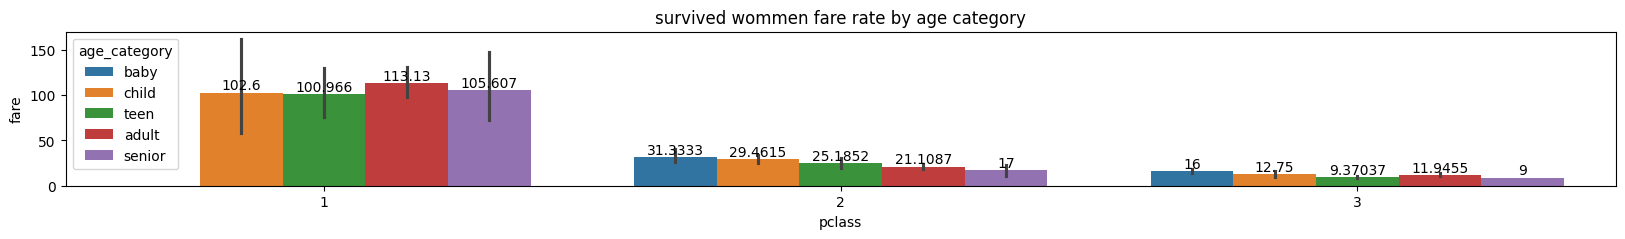

In [ ]:
df_female = df[(df['gender'] == 'female') & (df['survived'] == 1)]
plt.figure(figsize=(20, 2))
q = sns.barplot(data=df_female, x='pclass', y='fare',hue='age_category')
for i in q.containers:
    q.bar_label(i)
plt.title('survived wommen fare rate by age category')

# df_female = df[(df['gender'] == 'female') ]
# plt.figure(figsize=(20, 2))
# q = sns.barplot(data=df_female, x='pclass', y='fare',hue='survived')
# for i in q.containers:
#     q.bar_label(i)
# plt.title('')

1) pclass1- since the females are more in adult the fare of women in pclass of adult category=113.13
2) pclass2- 21.1087
3) pclass3-11.94

but the highest in each class by age category are:
1) pclass1=adult women =113.13
2) pclass2=baby 31.33
3) pclass3=child 12.75

Text(0.5, 1.0, 'age category wise survival rate by gender')

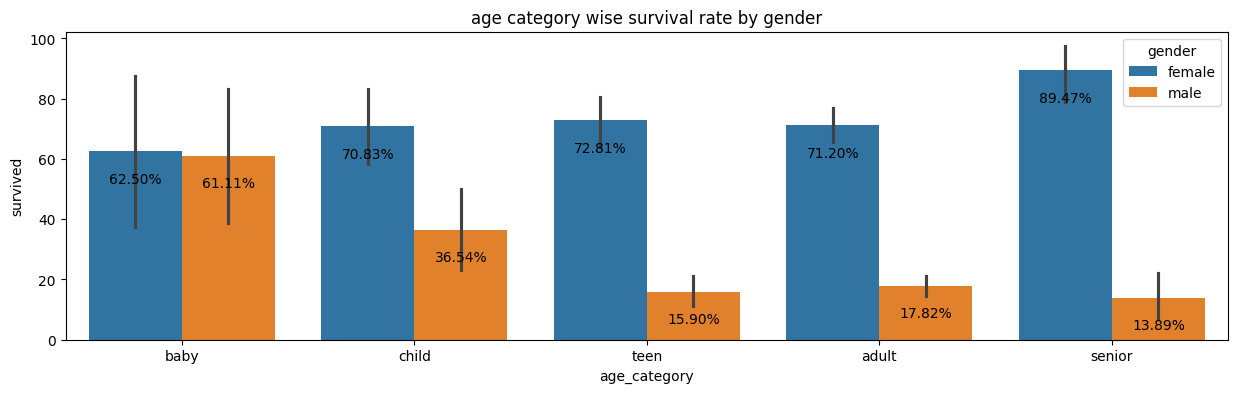

In [ ]:
#gender versus age_category
plt.figure(figsize=(15,4))
fe=sns.barplot(data=df,x='age_category',y='survived',hue='gender',estimator=lambda z:(sum(z)/len(z)*100))
for i in fe.containers:
 fe.bar_label(i,fmt='%.2f%%',padding=-25)
plt.title('age category wise survival rate by gender')

females are having high chances of survival in each age_group
babies (male)  are having  almost equal survival rate to female passengers 


while age effecting the survival of women :
                        younger female have higher survival rate and and women aged b/w 18-40 approx are having the high oriority to get survived

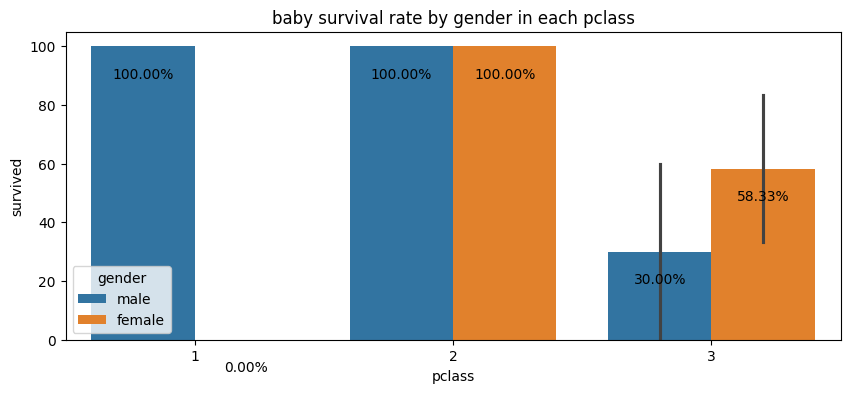

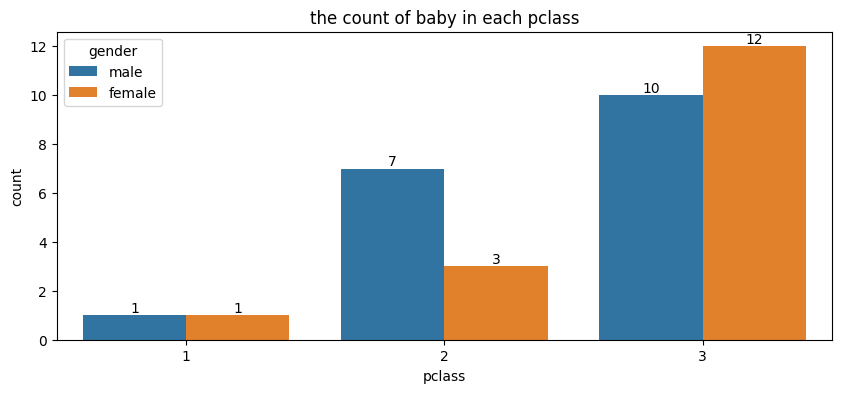

In [ ]:
n_df=df[df['age_category']=='baby']
plt.figure(figsize=(10,4))
fe=sns.barplot(data=n_df,x='pclass',y='survived',hue='gender',estimator=lambda z:(sum(z)/len(z)*100))
for i in fe.containers:
 fe.bar_label(i,fmt='%.2f%%',padding=-25)
plt.title('baby survival rate by gender in each pclass')

count_of_bby=df[df['age_category']=='baby']
plt.figure(figsize=(10,4))
plt.title('the count of baby in each pclass')
fe=sns.countplot(data=count_of_bby,x='pclass',hue='gender')
for i in fe.containers:
 fe.bar_label(i)

by above graph the survival rate of baby in pclass 2 are having 100% chances of survival and other pclass by app 50%

In [ ]:
# f=sns.FacetGrid(df,col='age_category')
# f.map_dataframe(sns.countplot,x='pclass',hue='gender',palette='cool')
# plt.legend()


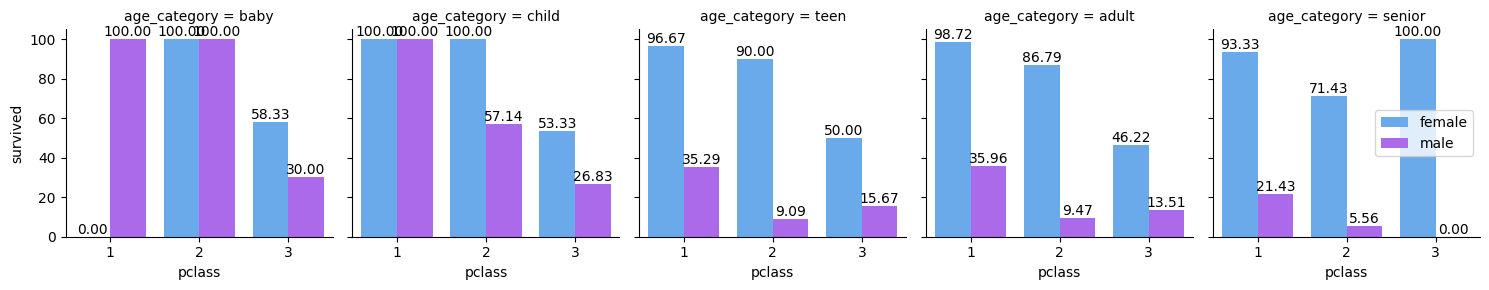

In [ ]:
f=sns.FacetGrid(df,col='age_category')
f.map_dataframe(sns.barplot,x='pclass',y='survived',hue='gender',
                hue_order=['female','male'],errorbar=None,
                estimator=lambda z:(sum(z)/len(z)*100),palette='cool')
plt.legend()

z=f.axes.ravel()

for ax in z:
    for i in ax.containers:
        ax.bar_label(i,fmt='%.2f')

observation: the baby in pclass-2 are having 100% survival rate of female and male 
and in child category the pclass-1 are habing 100% survival rate of female and male
and in other age category females are having more survival rare than men

C:\Users\ashwi\AppData\Local\Temp\ipykernel_27380\4014931733.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


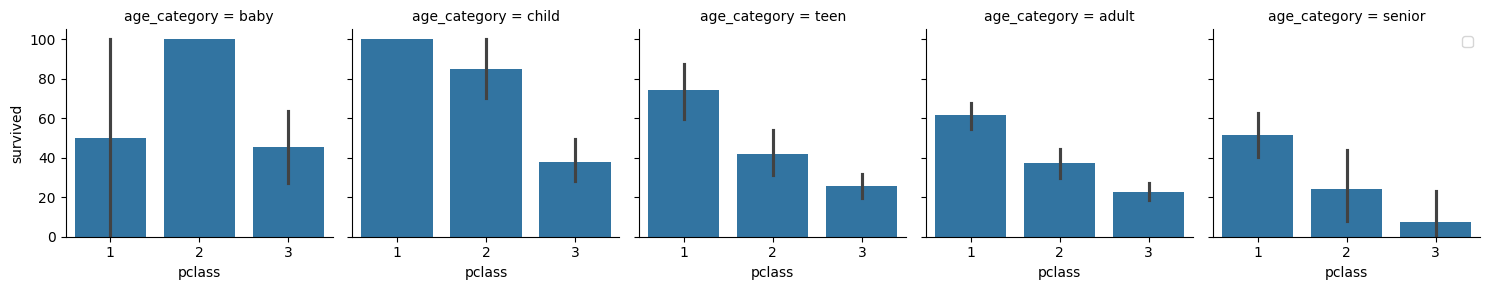

In [ ]:
f=sns.FacetGrid(df,col='age_category')
f.map_dataframe(sns.barplot,x='pclass',y='survived',estimator=lambda z:(sum(z)/len(z)*100))
plt.legend()

age category wise survival rate , regardless of gender to determine the highest survival rate by each age category by their pclass

observation:  

In [ ]:
# df[(df['age_category']=='baby') & (df['gender']=='male') & (df['pclass']==1)]

In [ ]:
# # female and adult 
# cond=df[(df['gender']=='female') & (df['age_category']=='adult')]
# plt.figure(figsize=(4,2))
# plt.title('women in adult category by fare')
# a=sns.boxenplot(data=cond,x='fare')
# a.bar_label(a.containers[0])
# cond



by above analysis may be woem in adult age category survived more than any other age category ,pherhas age category a reason for women survival

In [ ]:
solo_travelers = df[df['family_count'] == 0].groupby('gender').size()
family_travelers = df[df['family_count'] > 1].groupby('gender').size()
fig, ax = plt.subplots()

# solo travelers count
ax.bar(solo_travelers.index, solo_travelers,label='Solo Travelers', align='center')

# family travelers count
# ax.bar(family_travelers.index, family_travelers,label='Family Travelers', align='edge')

ax.set_title('Solo Travelers vs Family Travelers by Gender')
ax.legend()

NameError: name 'df' is not defined

>>More males were solo travelers compared to family travelers.

>>Females had a more balanced distribution, with solo and family travelers being somewhat comparable in number.

>>Male solo travelers significantly outnumber female solo travelers.

>>Family travelers were fewer overall, but their distribution among genders appears somewhat equal.

In [ ]:
#cross check the counts by pandas
female_df = df[(df['gender'] == 'female') & (df['survived'] == 1)]
count_by_title = female_df.groupby('courtesy_title').count()
count_by_title


,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
courtesy_title,,,,,,,,,,,
Dona,1,1,1,1,1,1,1,1,1,1,1
Dr,1,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1
Miss,176,176,176,176,176,176,176,176,176,176,176
Mlle,2,2,2,2,2,2,2,2,2,2,2
Mme,1,1,1,1,1,1,1,1,1,1,1
Mrs,155,155,155,155,155,155,155,155,155,155,155
Ms,1,1,1,1,1,1,1,1,1,1,1
the Countess,1,1,1,1,1,1,1,1,1,1,1


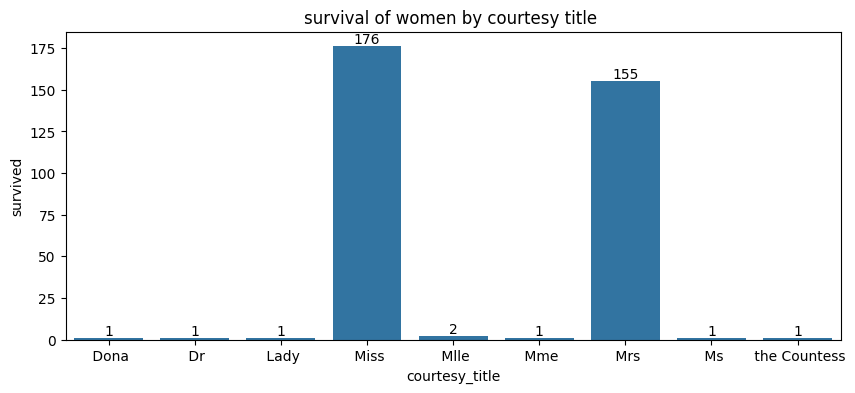

In [ ]:
plt.figure(figsize=(10,4))
p=sns.barplot(x='courtesy_title',y='survived',data=count_by_title)
p.bar_label(p.containers[0])
plt.title('survival of women by courtesy title ')
plt.show()


1) lady = wife of british peer 
2) mlle = miss in french
3) ms = used for woman , regardless pf their marital status
4) the countess = wife or widow of an earl (british man of high social position)
5) dona = similar tp lady

females travelling with family members had a high survival rate 

In [ ]:
# check how many women are their in each age category and their survival 
# by pandas
# women_df = df[(df['gender'] == 'female') & (df['survived'] == 1) ]
# women_age = women_df.groupby(['courtesy_title','age_category']).size()
# women_age
# sns.barplot(x='age_category', y='count', data=women_age)

In [ ]:
r = df[(df['gender'] == 'female') & (df['survived'] == 1)]
r.groupby('pclass').count()


,courtesy_title,fname,lname,gender,age,age_category,ticket,embarked,family_count,fare,survived
pclass,,,,,,,,,,,
1,139,139,139,139,139,139,139,139,139,139,139
2,94,94,94,94,94,94,94,94,94,94,94
3,106,106,106,106,106,106,106,106,106,106,106


1) pclass1=saved=139=fare=108.639
2) pclass2=saved=94=fare=23.5426
3) pclass3=saved=106=fare=11.6509

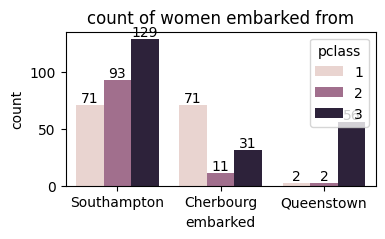

In [ ]:
# embarked and women survival
plt.figure(figsize=(4,2))
plt.title('count of women embarked from')
only_female=df[(df['gender']=='female')]
cc=sns.countplot(data=only_female,x='embarked',hue='pclass')
for i in cc.containers:
  cc.bar_label(i)

the most women are embarked from southampton in pclass-3 

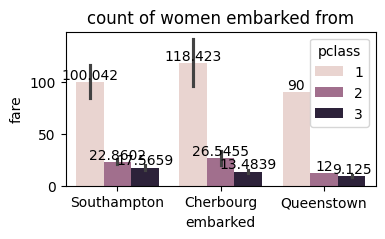

In [ ]:
plt.figure(figsize=(4,2))
plt.title('count of women embarked from')
only_female=df[(df['gender']=='female') ]
var=sns.barplot(data=only_female,x='embarked',y='fare',hue='pclass')
for i in var.containers:
    var.bar_label(i) 

female who embarked from cherbourg had higher survival rates and also , many first class passengers boared from cherbourg , contributing to better survival chances, since "women and children first" policy followed during the evacuation .

#
#
#
#





# class excersise

quartile1- 47.0
quartile2 or median- 51.0
quartile3- 55.0
8.0
67.0 35.0
[5, 99]


<Axes: >

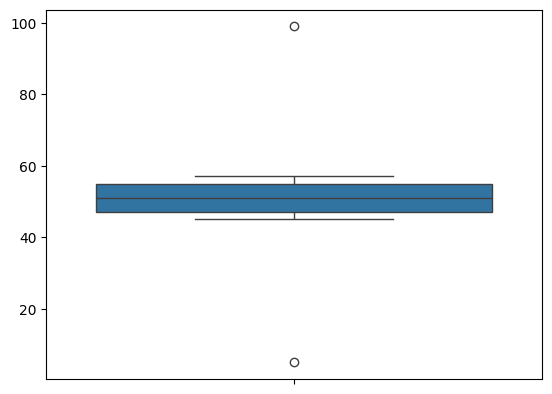

In [ ]:
x=[5,45,47,49,51,53,55,57,99]

q1=np.percentile(x,25)
print("quartile1-",q1)

q2=np.percentile(x,50)
print("quartile2 or median-",q2)

q3=np.percentile(x,75)
print("quartile3-",q3)

IQR=q3-q1
print(IQR)

upper_bound=q3+(1.5*IQR)
lower_bound=q1-(1.5*IQR)
print(upper_bound,lower_bound)

# to find the outliers exactly
outliers=[i for i in x if (i<lower_bound) or (i>upper_bound)]
print(outliers)

# plot the outliers by boxplot
sns.boxplot(x)

<Axes: >

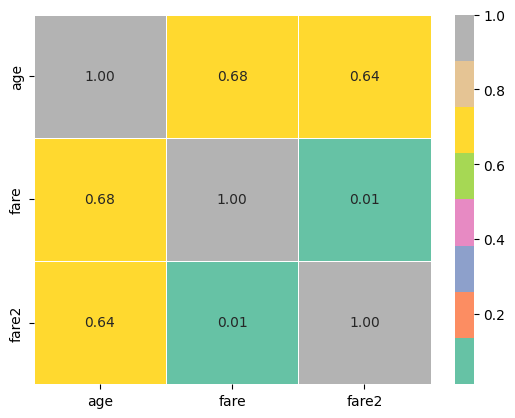

In [ ]:
# define a data frame 
dict={'age':[10,15,20,25,30,35],'fare':[100,175,120,160,200,2100],'fare2':[110,115,118,189,175,140]}
df=pd.DataFrame(dict)
# try to do corr between the col of df and store that in a variable to plot it in heatmap
a=df.corr()
# plot the map , annot is used to get the datalabels , lw=the seperation b/w all the sqs , cmap = color combinatiom
sns.heatmap(a,annot=True,cmap='Set2',linewidths=0.5,fmt='0.2f')

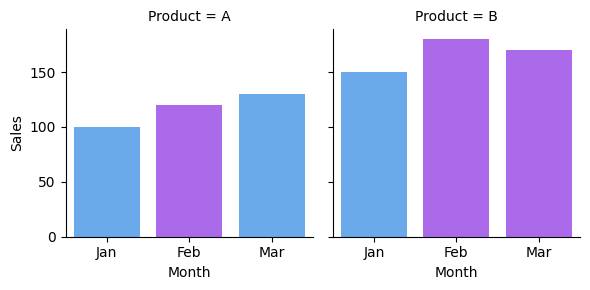

In [ ]:
data = {'Month':['Jan', 'Jan','Feb','Feb', 'Mar','Mar'],
       'Product':['A', 'B', 'A', 'B', 'A', 'B'],
       'Region':['East', 'East', 'west', 'West', 'East','West'],
       'Sales':[100, 150, 120, 180, 130, 170]}

month = pd.DataFrame(data)
g = sns.FacetGrid(month, col="Product")
g.map_dataframe (sns.barplot, x="Month", y="Sales",hue="Region",palette='cool')
plt.show()

,Month,Product,Region,Sales
0,Jan,A,East,100
1,Jan,B,East,150
2,Feb,A,west,120
3,Feb,B,West,180
4,Mar,A,East,130
5,Mar,B,West,170
